In [1]:
!pip install torch torchvision
!pip install nvidia-ml-py3

  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/109.3 MB ? eta -:--:--
   ---------------------------------------- 1.0/109.3 MB 7.2 MB/s eta 0:00:15
    --------------------------------------- 2.6/109.3 MB 7.8 MB/s eta 0:00:14
   - -------------------------------------- 4.7/109.3 MB 8.5 MB/s eta 0:00:13
   -- ------------------------------------- 6.3/109.3 MB 8.3 MB/s eta 0:00:13
   -- ------------------------------------- 8.1/109.3 MB 8.5 MB/s eta 0:00:12
   --- ------------------------------------ 10.5/109.3 MB 8.9 MB/s eta 0:00:12
   ---- ----------------------------------- 12.3/109.3 MB 9.0 MB/s eta 0:00:11
   ----- ---------------------------------- 14.7/109.3 MB 9.3 MB/s eta 0:00:11
   ------ --------------------------------- 17.0/109.3 MB 9.5 MB/s eta 0:00:10
   ------- -------------------------------- 19.1/109.3 MB 9.7 MB/s eta 0:00:10
   ------- -------------------------------- 21.5/109.3 MB 9.8 MB/s eta 0:00:09
  

In [12]:
!pip install cmake
!pip install dlib
!pip install face_recognition



  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)


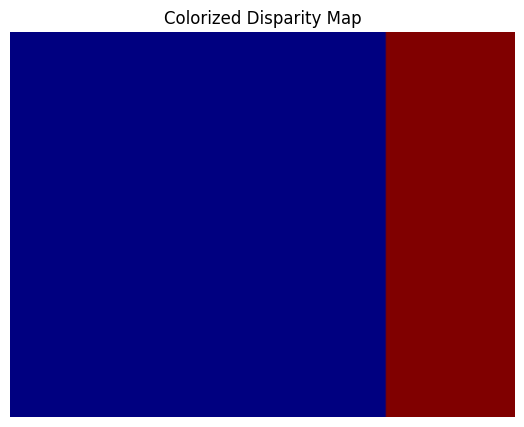

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], shape=(164, 215), dtype=uint8)

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_disparity(path_left, path_right):
    # Load images in grayscale
    left_image = cv2.imread(path_left, cv2.IMREAD_GRAYSCALE)
    right_image = cv2.imread(path_right, cv2.IMREAD_GRAYSCALE)

    # Check if images loaded correctly
    if left_image is None or right_image is None:
        print("Error: Could not load one or both images.")
        return None

    # Stereo SGBM parameters
    min_disp = 0

    num_disp = 16 * 10   # more disparity range
    block_size = 11      # larger block for smoother results


    stereo = cv2.StereoSGBM_create(
        minDisparity=min_disp,
        numDisparities=num_disp,
        blockSize=block_size,
        P1=8 * 3 * block_size ** 2,
        P2=32 * 3 * block_size ** 2,
        disp12MaxDiff=1,
        uniquenessRatio=15,
        speckleWindowSize=100,
        speckleRange=32
    )

    # Compute disparity
    disparity = stereo.compute(left_image, right_image).astype(np.float32) / 16.0

    # Normalize disparity to 0–255
    disparity_display = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX)
    disparity_display = np.uint8(disparity_display)
    
    # Apply color map (JET gives red-yellow-blue effect)
    colored_disparity = cv2.applyColorMap(disparity_display, cv2.COLORMAP_JET)
    
    # Show the colorized result
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(colored_disparity, cv2.COLOR_BGR2RGB))
    plt.title("Colorized Disparity Map")
    plt.axis('off')
    plt.show()


    return disparity_display

# Example usage
compute_disparity('image31.jpeg', 'image31.jpeg')


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load left and right images (grayscale for stereo matching)
left_image = cv2.imread('left.jpg', cv2.IMREAD_GRAYSCALE)
right_image = cv2.imread('right.jpg', cv2.IMREAD_GRAYSCALE)

# Check if images loaded properly
if left_image is None or right_image is None:
    print("Error: One or both images not found!")
    exit()

# Create StereoBM object (Block Matching)
stereo = cv2.StereoBM_create(numDisparities=16*6, blockSize=15)

# Compute disparity map
disparity = stereo.compute(left_image, right_image)

# Normalize the result for visualization
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255,
                                     norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Left Image")
plt.imshow(left_image, cmap='gray')

plt.subplot(1,2,2)
plt.title("Disparity Map (Stereo Correspondence)")
plt.imshow(disparity_normalized, cmap='jet')
plt.colorbar()
plt.show()

